<a href="https://colab.research.google.com/github/aarnavg54/aarnavg54/blob/main/Backpropagation_With_the_XOR_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This code is a modified version of the XOR problem
# The XOR problem implements backpropagation to map an input matrix onto an output matrix.
# We create a neural network and train it by using gradient descent

import numpy as np

# Defining our input
X = np.array([[0,0], [0,1], [1,0], [1,1]]).T

# Defining our expected output
d = np.array([0,0,0,1])

# Initializing our layer sizes, learning rate, and iterations
inputSize = 2
hiddenSize = 2
outputSize = 1
lr = 0.1
epochs = 180000

In [2]:
# Defining out weights and biases
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
b1 = np.random.rand(hiddenSize, 1) * 2 - 1
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
b2 = np.random.rand(outputSize, 1) * 2 - 1

In [4]:
# Training the neural network with backpropagation (gradient descent)
error_list = []

# A loop for iterating through the epochs
for epoch in range(epochs):

  # Forward propagation; calculating the weighted sum for the hidden layer
  z1 = np.dot(w1, X) + b1
  a1 = 1 / (1 + np.exp(-z1))

  z2 = np.dot(w2, a1) + b2
  a2 = 1 / (1 + np.exp(-z2))

  # Error calculation: predicted - actual values
  error = d - a2
  # Derivative of output layer
  da2 = error * (a2 * (1 - a2))
  # Gradient for output layer
  dz2 = da2

  # Propagating the hidden layer
  da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
  dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

  # Update weights and biases
  w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
  b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

  w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
  b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
  if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.02523
Epoch: 19999, Average error: 0.01604
Epoch: 29999, Average error: 0.01254
Epoch: 39999, Average error: 0.01058
Epoch: 49999, Average error: 0.00930
Epoch: 59999, Average error: 0.00838
Epoch: 69999, Average error: 0.00768
Epoch: 79999, Average error: 0.00713
Epoch: 89999, Average error: 0.00668
Epoch: 99999, Average error: 0.00630
Epoch: 109999, Average error: 0.00597
Epoch: 119999, Average error: 0.00570
Epoch: 129999, Average error: 0.00545
Epoch: 139999, Average error: 0.00523
Epoch: 149999, Average error: 0.00504
Epoch: 159999, Average error: 0.00487
Epoch: 169999, Average error: 0.00471
Epoch: 179999, Average error: 0.00456


In [11]:
# Testing the network
z1 = np.dot(w1,X) + b1  # Weighted sum for 1st hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Applying the Sigmoid Function

z2 = np.dot(w2,a1) + b2  # Weighted sum for 2nd hidden layer
a2 = 1 / (1 + np.exp(-z2))  # Applying the Sigmoid Function

print(f"Final output after training: {a2}")
print(f"Ground truth (original matrix): {d}")
print(f"Error after training: {error}")

# Notice how each output value closely matches the original matrix

Final output after training: [[1.76503919e-04 4.74584157e-03 4.71542996e-03 9.91379360e-01]]
Ground truth (original matrix): [0 0 0 1]
Error after training: [[-0.0001765  -0.00474586 -0.00471544  0.00862067]]


Text(0, 0.5, 'Error')

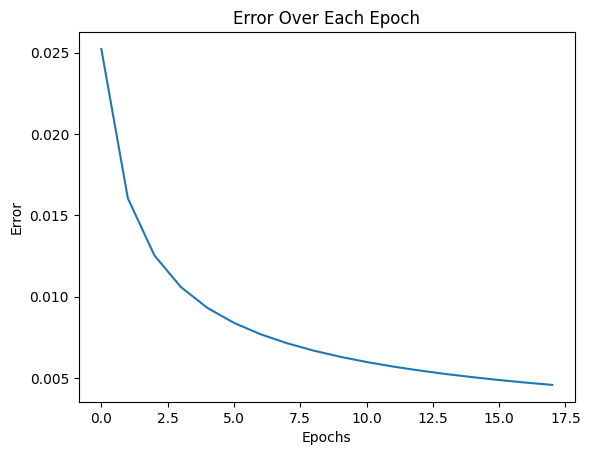

In [12]:
# Plotting the error
import matplotlib.pyplot as plt

plt.plot(error_list)
plt.title("Error Over Each Epoch")
plt.xlabel("Epochs")
plt.ylabel("Error")

#We can clearly see that the error decreases with each iteration